In [1]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
import joblib

In [2]:
import pandas as pd #
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler

In [3]:
df_train=pd.read_csv("StudentsPerformance.csv")

In [4]:
df_train.head()

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,female,bachelor's degree,none,72,72,74,88,69,86,3,15,90,no,75.0,Pass,83
1,2,female,some college,completed,69,90,88,76,63,86,1,15,90,yes,77.2,Pass,94
2,3,female,master's degree,none,90,95,93,95,56,86,2,15,90,no,85.8,Pass,70
3,4,male,associate's degree,Partialy completed,47,57,44,94,40,85,2,15,90,yes,56.4,Pass,70
4,5,male,some college,none,76,78,75,77,97,86,2,15,90,no,80.6,Pass,67


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Student_id                                    999 non-null    int64  
 1   gender                                        999 non-null    object 
 2   parental level of education                   999 non-null    object 
 3   test preparation course                       999 non-null    object 
 4   Software Engineering score                    999 non-null    int64  
 5   Machine Learningscore                         999 non-null    int64  
 6   DBMS score                                    999 non-null    int64  
 7   Elective 1 score                              999 non-null    int64  
 8   Elective 2 score                              999 non-null    int64  
 9   Attendance                                    999 non-null    int

In [6]:
df_train.columns

Index(['Student_id', 'gender', 'parental level of education',
       'test preparation course', 'Software Engineering score',
       'Machine Learningscore', 'DBMS score', 'Elective 1 score',
       'Elective 2 score', 'Attendance', 'Study hours/Day', 'Assignment marks',
       'Time spent on social media in mins',
       'Participation in extra cirricular activities',
       'Current Sem percentage', 'Pass/Fail', 'Previous sem percentage'],
      dtype='object')

In [7]:
def getLabelCount(df,target):
    return sorted([( labelValue,len(df.loc[df[target] == labelValue]) ) for labelValue in df[target].unique()])
TARGET = "Pass/Fail"
labelCount = getLabelCount(df_train,TARGET)
labelCount

[('Fail', 24), ('Pass', 975)]

<AxesSubplot:>

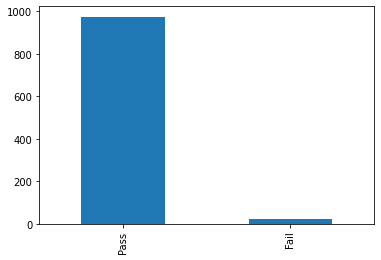

In [8]:
df_train['Pass/Fail'].value_counts().plot(kind='bar')

In [9]:
def dynamic_label_encode(df):
    encoded_df = df.copy()
    label_encoders = {}

    for column in df.select_dtypes(include=['object']).columns:
        le = preprocessing.LabelEncoder()
        encoded_df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return encoded_df, label_encoders

encoded_df, label_encoders = dynamic_label_encode(df_train)

In [10]:
label_encoders

{'gender': LabelEncoder(),
 'parental level of education': LabelEncoder(),
 'test preparation course': LabelEncoder(),
 'Participation in extra cirricular activities': LabelEncoder(),
 'Pass/Fail': LabelEncoder()}

In [11]:
b=encoded_df
b.to_csv("preprocess.csv")
encoded_df

,Student_id,gender,parental level of education,test preparation course,Software Engineering score,Machine Learningscore,DBMS score,Elective 1 score,Elective 2 score,Attendance,Study hours/Day,Assignment marks,Time spent on social media in mins,Participation in extra cirricular activities,Current Sem percentage,Pass/Fail,Previous sem percentage
0,1,0,1,2,72,72,74,88,69,86,3,15,90,0,75.0,1,83
1,2,0,4,1,69,90,88,76,63,86,1,15,90,2,77.2,1,94
2,3,0,3,2,90,95,93,95,56,86,2,15,90,0,85.8,1,70
3,4,1,0,0,47,57,44,94,40,85,2,15,90,2,56.4,1,70
4,5,1,4,2,76,78,75,77,97,86,2,15,90,0,80.6,1,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,1,4,2,81,74,81,89,65,47,3,18,100,1,78.0,1,74
995,996,1,0,0,90,85,89,69,40,75,1,12,100,1,74.6,1,72
996,997,1,4,2,65,89,87,63,57,80,4,11,100,1,72.2,1,98
997,998,0,1,2,75,100,71,76,69,52,4,13,100,1,78.2,1,91


In [12]:
df_numerics_only = df_train.select_dtypes(include=np.number)

In [13]:
to_scale = [col for col in encoded_df.columns if encoded_df[col].max()>1]

In [14]:
to_scale.remove('Current Sem percentage')

In [15]:
scaler = RobustScaler()
scaled =scaler.fit_transform(encoded_df[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    encoded_df[col] = scaled[col]

In [16]:
# Mean (center) for each feature
mean_values = scaler.center_

# Scale factor for each feature
scale_factors = scaler.scale_

print(np.average(mean_values))
print(np.average(scale_factors))

76.85714285714286
50.964285714285715


In [17]:
to_scale

['Student_id',
 'parental level of education',
 'test preparation course',
 'Software Engineering score',
 'Machine Learningscore',
 'DBMS score',
 'Elective 1 score',
 'Elective 2 score',
 'Attendance',
 'Study hours/Day',
 'Assignment marks',
 'Time spent on social media in mins',
 'Participation in extra cirricular activities',
 'Previous sem percentage']

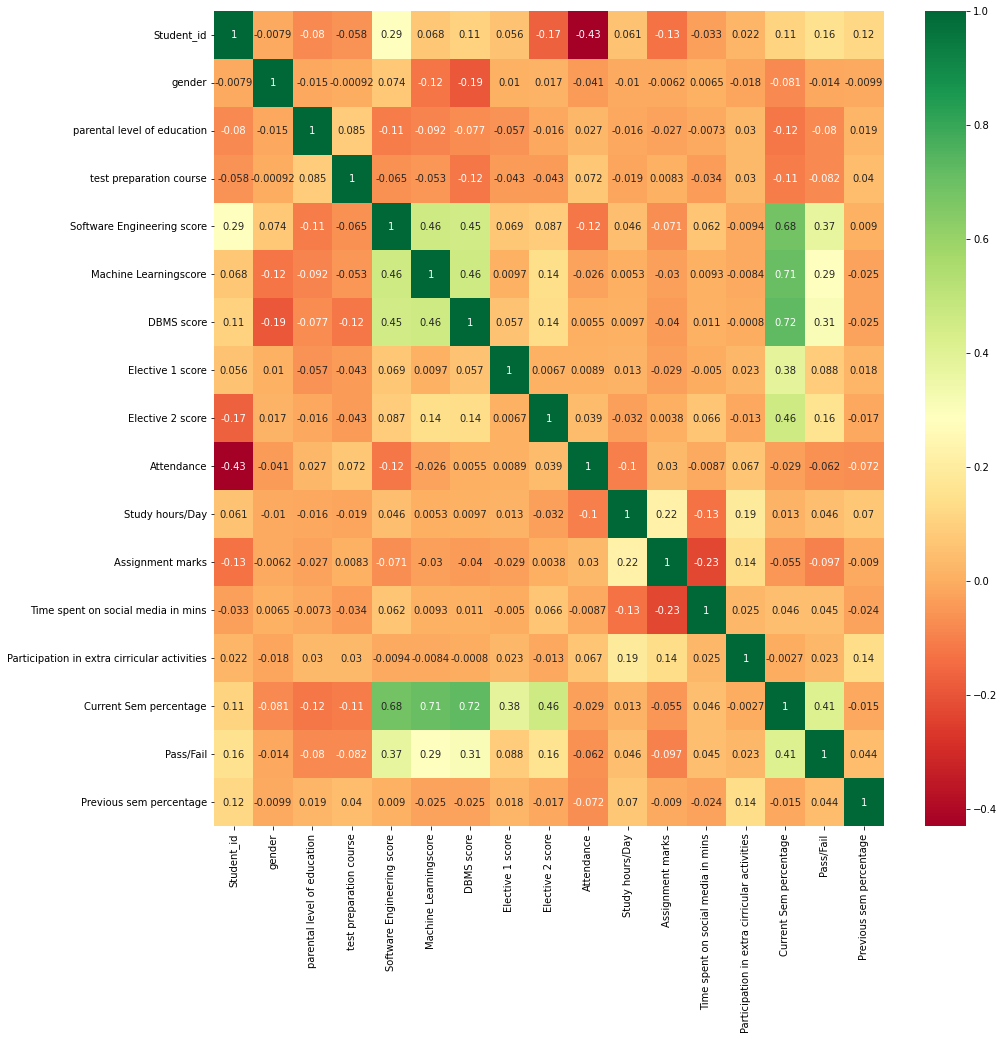

In [18]:
corrmat = encoded_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))

#plot heat map
g=sns.heatmap(encoded_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [19]:
X=encoded_df.drop(["Pass/Fail",'Current Sem percentage','Student_id'], axis=1)
Y=encoded_df["Current Sem percentage"]
print(X.shape)
print(Y.shape)

(999, 14)
(999,)


In [20]:
Y

0      75.0
1      77.2
2      85.8
3      56.4
4      80.6
       ... 
994    78.0
995    74.6
996    72.2
997    78.2
998    65.4
Name: Current Sem percentage, Length: 999, dtype: float64

In [21]:
# sklearn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train_new,X_test,y_train_new,y_test = train_test_split(X, Y, test_size = 0.1, random_state = 12)

In [22]:
print(X_train_new.shape)
print(y_train_new.shape)

(899, 14)
(899,)


In [23]:
# !pip install -U imbalanced-learn

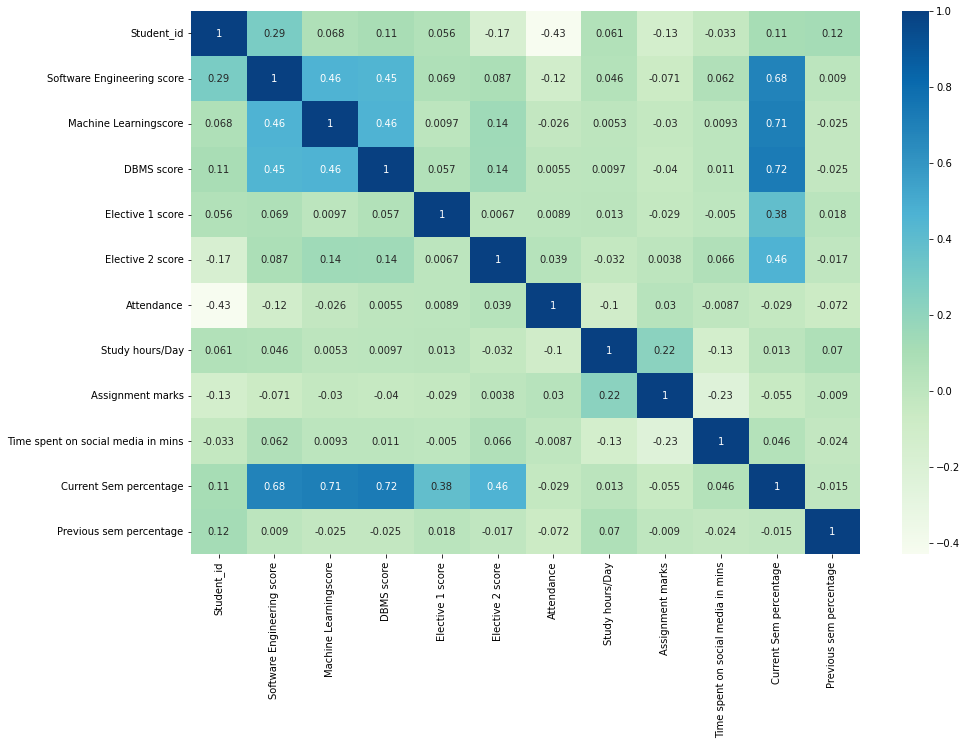

In [24]:
plt.figure(figsize= (15, 10))
sns.heatmap(df_numerics_only.corr(), annot=True, cmap= 'GnBu')
plt.show()

# KNeighborsRegressor

In [25]:
from sklearn.neighbors import KNeighborsRegressor  
from sklearn.metrics import mean_squared_error,r2_score
classifier= KNeighborsRegressor(n_neighbors=5)  
classifier.fit(X_train_new, y_train_new) 

KNeighborsRegressor()

In [26]:
y_pred4=classifier.predict(X_test)

In [27]:
print("mean_squared_error KNN:",mean_squared_error(y_test, y_pred4))
r2 = r2_score(y_test, y_pred4)
print(f"R-squared score: {r2}")

# Save the trained model to a file using joblib
# model_filename2 = "models/KNN_Regressor_model.joblib"
# joblib.dump(classifier, model_filename2)
# print(f"Model saved as {model_filename2}")

mean_squared_error KNN: 9.483551999999998
R-squared score: 0.8717455241752715


In [28]:
y_test

517    68.8
870    73.8
839    71.6
274    80.2
325    73.6
       ... 
403    92.6
569    80.8
541    76.0
29     71.4
116    71.6
Name: Current Sem percentage, Length: 100, dtype: float64

In [29]:
y_pred4

array([69.44, 73.2 , 72.72, 78.  , 73.68, 72.4 , 61.56, 62.72, 70.88,
       56.4 , 59.72, 74.28, 57.4 , 66.84, 55.36, 59.72, 57.4 , 66.48,
       65.48, 65.04, 80.92, 69.84, 79.96, 68.04, 73.56, 68.28, 63.64,
       61.92, 55.16, 75.56, 74.8 , 69.24, 76.2 , 67.32, 74.12, 60.72,
       68.24, 60.24, 76.04, 66.2 , 70.12, 73.68, 70.84, 66.52, 60.84,
       79.24, 68.48, 67.16, 55.  , 71.2 , 71.92, 66.52, 73.52, 75.4 ,
       73.72, 75.44, 70.52, 68.2 , 58.48, 78.28, 72.08, 54.  , 65.56,
       70.  , 66.92, 71.68, 73.16, 58.4 , 80.4 , 60.68, 69.72, 76.2 ,
       71.24, 73.04, 65.44, 58.8 , 70.92, 70.64, 73.88, 64.68, 77.92,
       67.72, 67.24, 74.72, 65.12, 68.84, 81.28, 71.56, 72.24, 63.36,
       78.72, 62.8 , 71.64, 73.4 , 78.  , 86.32, 76.8 , 74.48, 70.96,
       72.4 ])

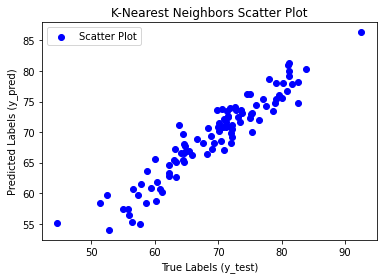

In [30]:
import matplotlib.pyplot as plt

# Assuming you have imported y_test and y_pred from your KNN model
# y_test contains the true labels, and y_pred contains the predicted labels.

# Create a scatter plot
plt.scatter(y_test, y_pred4, c='blue', label='Scatter Plot')

# Add labels and title
plt.xlabel('True Labels (y_test)')
plt.ylabel('Predicted Labels (y_pred)')
plt.title('K-Nearest Neighbors Scatter Plot')

# Show the legend
plt.legend(loc='best')
plt.savefig('Scatter.jpg')
# Show the plot
plt.show()

In [31]:
# # Load the saved model using joblib
# loaded_model2 = joblib.load(model_filename2)

# # Make predictions using the loaded model
# new_predictions = loaded_model2.predict(X_test)

# DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()

# Fit the model to your training data
clf.fit(X_train_new, y_train_new)

DecisionTreeRegressor()

In [33]:
y_pred1 = clf.predict(X_test)

In [34]:
print("mean_squared_error DecisionTree:",mean_squared_error(y_test, y_pred1))
r3 = r2_score(y_test, y_pred1)
print(f"R-squared score: {r3}")

# Save the trained model to a file using joblib
# model_filename3 = "models/DecisionTree_Regressor_model.joblib"
# joblib.dump(clf, model_filename3)
# print(f"Model saved as {model_filename3}")

mean_squared_error DecisionTree: 11.842799999999993
R-squared score: 0.8398393232517632


In [35]:
# # Load the saved model using joblib
# loaded_model3 = joblib.load(model_filename3)

# # Make predictions using the loaded model
# new_predictions = loaded_model3.predict(X_test)

# SVC

In [36]:
from sklearn.svm import SVR
model = SVR(kernel='linear')  # You can choose different kernel functions like 'linear', 'rbf', etc.

# Train the model on the training data
model.fit(X_train_new, y_train_new)

# Make predictions on the test data
y_pred2 = model.predict(X_test)

In [37]:
from sklearn import metrics
print("mean_squared_error SVC:",mean_squared_error(y_test, y_pred2))
r4 = r2_score(y_test, y_pred2)
print(f"R-squared score: {r4}")

# Save the trained model to a file using joblib
# model_filename4 = "models/SVC_Regressor_model.joblib"
# joblib.dump(model, model_filename4)
# print(f"Model saved as {model_filename4}")

mean_squared_error SVC: 0.0019543639975317774
R-squared score: 0.9999735694041564


In [42]:
# # Load the saved model using joblib
# loaded_model4 = joblib.load(model_filename4)

# # Make predictions using the loaded model
# new_predictions = loaded_model4.predict(X_test)

# RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor  # for regression

reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)

reg.fit(X_train_new, y_train_new)  # for regression
y_pred5 = reg.predict(X_test)

In [44]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print("mean_squared_error SVC:",mean_squared_error(y_test, y_pred5))
r4 = r2_score(y_test, y_pred5)
print(f"R-squared score: {r4}")

# Save the trained model to a file using joblib
# model_filename5 = "models/RandomForest_Regressor_model.joblib"
# joblib.dump(reg, model_filename5)
# print(f"Model saved as {model_filename5}")

mean_squared_error SVC: 3.3024939101615574
R-squared score: 0.9553374489471742


In [45]:
# # Load the saved model using joblib
# loaded_model5 = joblib.load(model_filename5)

# # Make predictions using the loaded model
# new_predictions = loaded_model5.predict(X_test)

# Logistic Regression

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [67]:
#import dataset from CSV file on Github
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
data = pd.read_csv(url)

#define the predictor variables and the response variable
X = data[['student', 'balance', 'income']]
y = data['default']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

LogisticRegression()

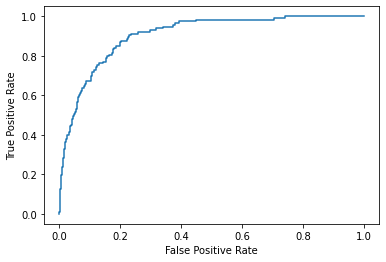

In [68]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
y_pred_proba

array([1.89326075e-04, 1.42768942e-04, 5.71581735e-03, ...,
       1.53798179e-01, 1.10495803e-03, 6.85351703e-04])